In [ ]:
from google.colab import drive
# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


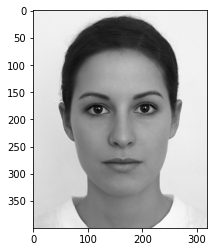

(400, 320)

In [ ]:
import numpy as np
import cv2 as cv
from numpy import linalg as LA
from matplotlib import pyplot as plt
# import sys
# sys.setrecursionlimit(10**9)

img_address = "drive/My Drive/face.jpg"
img = cv.imread(img_address,0)
width, height = img.shape
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
img.shape

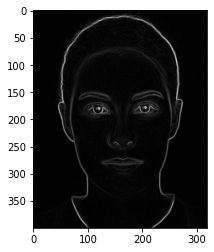

(400, 320)

In [ ]:
def sobel(k):
  Kv = np.array([
                 [-1, 0, 1],
                 [-k, 0, k],
                 [-1, 0, 1]
  ]);
  Kh = Kv.T
  Ev = np.zeros((width, height))
  Eh = np.zeros((width, height))
  for i in range(1, width - 1):
        for j in range(1, height - 1):
          Ev[i, j] = np.sum(np.multiply(img[i - 1 : i + 2, j - 1 : j + 2], Kv))
          Eh[i, j] = np.sum(np.multiply(img[i - 1 : i + 2, j - 1 : j + 2], Kh))
  Et = np.sqrt(np.square(Ev) + np.square(Eh))
  angles = np.rad2deg(np.arctan2(Eh, Ev))
  angles[angles < 0] += 180
  return Et, angles 

Et, angles = sobel(2)
plt.imshow(Et, cmap=plt.get_cmap('gray'))
plt.show()
Et.shape

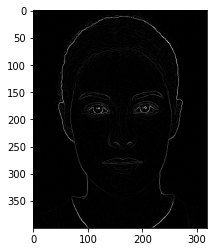

In [ ]:
def nms(Et, angles):
  r = 45 / 2
  val = np.zeros(shape=(width, height))
  for i in range(1, width - 1):
    for j in range(1, height - 1):
      if (0 <= angles[i, j] < r) or ((135+r) <= angles[i, j] <= 180):
        val[i][j] = max(Et[i][j - 1], Et[i, j + 1])
      elif (r <= angles[i, j] < (45+r)):
        val[i][j] = max(Et[i - 1, j - 1], Et[i + 1, j + 1])
      elif ((45+r) <= angles[i, j] < (90+r)):
        val[i][j] = max(Et[i - 1, j], Et[i + 1, j])
      else:
        val[i][j] = max(Et[i + 1, j - 1], Et[i - 1, j + 1])

  nms_img = np.where(Et >= val, Et, 0)
  return nms_img

nms_img = nms(Et, angles)
plt.imshow(nms_img, cmap=plt.get_cmap('gray'))
plt.show()